### TODO:
- [ ] latency summary에 추가하기
- [ ] frame drop baseline performance 비교하는 figure 만들기; 기존 (using summary)
- [ ] frame drop baseline들 backlog 증가 그래프 그리는 figure 만들기; 기존 (using data)
- [ ] offloading baseline performance 비교하는 figure 만들기; fraction & accuracy & latency 비교; simulation에서 쓰던 형태 (using data & summary)
- [ ] offloading baseline들 backlog 증가 그래프 그리는 figure 만들기; 기존 (using data)
- [ ] multi agent 성능 비교 하는 figure 만들기
- [ ] multi agent에서 각 source node의 backlog 증가 그래프 그려서 비교하기

### Import libraries

In [4]:
import os, sys, time, re, random
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
import csv, json, ast  

In [4]:
### User define libraries
import visualization as vis
import warnings

warnings.filterwarnings("ignore")

### Define methods

In [ ]:

def extract_value_from_latency(value_str):
    return float(value_str.split('ms')[0].strip())

def get_latency_exp(csv_path):
    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path)
        df['latency'] = df['latency'].apply(extract_value_from_latency)
        return df
        
def get_backlog_exp(csv_path):
    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path)
        return df[['sum', 'avg']]
    
# def calculate_mean_latency(df):
#     mean_value = df['latency'].mean()
#     return mean_value

def calculate_mean_latency(df, length):
    mean_value = df['latency'].mean()
    if length > len(df) + 5:    
        sum_value = df['latency'].sum() 
        sum_value += (length-len(df)-5)*300000
        mean_value = sum_value / length
        
    return mean_value


### Define setting

In [7]:
experiment_path = 'data/experiment'
frame_drop_summary_path = 'data/summary/frame_dropping.csv'
computation_offloading_summary_path = 'data/summary/computation_offloading.csv'
multi_agent_summary_path = 'data/summary/multi_agent.csv'

dataset_list = ['JN', 'JK', 'SD']
exp_type_list = ['frame_dropping', 'computation_offloading', 'multi_agent']
frame_drop_method_list = ['LRLO', 'Reducto', 'FrameHopper', 'CAO']
computation_offloading_method_list = ['LRLO','JDPCRA', 'TLDOC']

#### 0. get average latency value

In [ ]:
MS_TO_S = 1000

for dataset in dataset_list:
    for exp_type in exp_type_list:
        if exp_type == 'frame_dropping':
            for method in frame_drop_method_list:
                base_dir = f'{experiment_path}/{exp_type}/{method}_{dataset}'
                
                if method != 'CAO':
                    subfolder_paths = [os.path.join(base_dir, name) for name in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, name))]
                    for subfolder_path in subfolder_paths:
                        path_df = pd.read_csv(f'{subfolder_path}/path/path.csv')
                        job_length = len(path_df)
                        latency_file_path = f'{subfolder_path}/latency/test job 1.csv'
                        df = get_latency_exp(latency_file_path)
                        mean_latency = calculate_mean_latency(df, job_length) / MS_TO_S
                        print(f'{dataset}\t{exp_type}\t{method}\tmean latency: {mean_latency}\t ({latency_file_path})')
                
                else:
                    path_df = pd.read_csv(f'{base_dir}/path/path.csv')
                    job_length = len(path_df)
                    latency_file_path = f'{base_dir}/latency/test job 1.csv'
                    df = get_latency_exp(latency_file_path)
                    mean_latency = calculate_mean_latency(df, job_length) / MS_TO_S
                    print(f'{dataset}\t{exp_type}\t{method}\tmean latency: {mean_latency}')
        
        elif exp_type == 'computation_offloading':
            for method in computation_offloading_method_list:
                base_dir = f'{experiment_path}/{exp_type}/{method}_{dataset}'
                
                if method == 'LRLO':
                    subfolder_paths = [os.path.join(base_dir, name) for name in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, name))]
                    for subfolder_path in subfolder_paths:
                        path_df = pd.read_csv(f'{subfolder_path}/path/path.csv')
                        job_length = len(path_df)
                        latency_file_path = f'{subfolder_path}/latency/test job 1.csv'
                        df = get_latency_exp(latency_file_path)
                        mean_latency = calculate_mean_latency(df, job_length) / MS_TO_S
                        print(f'{dataset}\t{exp_type}\t{method}\tmean latency: {mean_latency}\t ({latency_file_path})')
                else:
                    path_df = pd.read_csv(f'{base_dir}/path/path.csv')
                    job_length = len(path_df)
                    latency_file_path = f'{base_dir}/latency/test job 1.csv'
                    df = get_latency_exp(latency_file_path)
                    mean_latency = calculate_mean_latency(df, job_length) / MS_TO_S
                
                    print(f'{dataset}\t{exp_type}\t{method}\tmean latency: {mean_latency}')
                    
        # else:
        #     base_dir = f'{experiment_path}/{exp_type}/LRLO(MA)_{dataset}'
        #     latency_file_path_1 = f'{base_dir}/latency/test job 1.csv'
        #     latency_file_path_2 = f'{base_dir}/latency/test job 2.csv'    
            
        #     df = get_latency_exp(latency_file_path_1)
        #     mean_latency = calculate_mean_latency(df) / MS_TO_S
        #     print(f'{dataset}\t{exp_type}\t{method}\tmean latency: {mean_latency}\t ({latency_file_path_1})')
            
        #     df = get_latency_exp(latency_file_path_2)
        #     mean_latency = calculate_mean_latency(df) / MS_TO_S
        #     print(f'{dataset}\t{exp_type}\t{method}\tmean latency: {mean_latency}\t ({latency_file_path_2})')

### 1. [Frame drop] performance 비교 (코드 완성)

In [ ]:
drop_df = pd.read_csv(frame_drop_summary_path, skipinitialspace=True)
drop_df

In [ ]:
from matplotlib.ticker import FuncFormatter

axis_size = 13
label_size = 15

drop_df['method_with_target'] = drop_df.apply(
    lambda row: "LRLO(Ours)" if row['method'] == "LRLO" else (f"{row['method']}({row['target_f1']})" if not pd.isna(row['target_f1']) else row['method']),
    axis=1
)
datasets = drop_df['dataset'].unique()

for dataset in datasets:
    subset = drop_df[drop_df['dataset'] == dataset]
    
    melted_df = subset.melt(id_vars=['method_with_target'], value_vars=['f1_score', 'fraction'], 
                            var_name='Metric', value_name='Value')

    fig, ax = plt.subplots(figsize=(7.2, 6))
    
    sns.barplot(data=melted_df, x='method_with_target', y='Value', hue='Metric', palette="viridis", ax=ax,  width=0.6, edgecolor='0')
    ax2 = ax.twinx()
    sns.lineplot(data=subset, x='method_with_target', y='latency', color="red", marker="o", label='latency', ax=ax2)

    # 축과 레이블 설정
    ax.set_xlabel('')
    ax.set_ylabel('Value (%)', fontsize=label_size)
    ax2.set_ylabel('Average latency (s)', fontsize=label_size)
    
    ax.tick_params(axis='x', rotation=35, labelsize=axis_size)

    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y * 100:.0f}'))  # 예: 0.1 -> 10
    
    # y축 tick 폰트 크기 조정
    ax.tick_params(axis='y', labelsize=axis_size)  
    ax2.tick_params(axis='y', labelsize=axis_size) 

    # 범례 폰트 크기 조정
    ax.legend(loc='upper left', fontsize=axis_size)
    ax2.legend(loc='upper right', fontsize=axis_size)

    plt.tight_layout()
    plt.show()

### 2. [Frame Drop] Backlog Graph

**2.1 backlog df 불러오기**

In [38]:
backlog_df_dict = {
    'JN': {
        'LRLO(Ours)': [],
        'Reducto(0.7)': None,
        'Reducto(0.9)': None,
        'FrameHopper(0.7)': None,
        'FrameHopper(0.9)': None,
        'CAO': None
    },
    'JK': {
        'LRLO(Ours)': [],
        'Reducto(0.7)': None,
        'Reducto(0.9)': None,
        'FrameHopper(0.7)': None,
        'FrameHopper(0.9)': None,
        'CAO': None
    },
    'SD': {
        'LRLO(Ours)': [],
        'Reducto(0.7)': None,
        'Reducto(0.9)': None,
        'FrameHopper(0.7)': None,
        'FrameHopper(0.9)': None,
        'CAO': None
    }
}

for dataset in datasets:
    for method in frame_drop_method_list:
        if method == 'CAO':
            backlog_path = f'{experiment_path}/frame_dropping/{method}_{dataset}/backlog/total_backlog.csv'
            df = get_backlog_exp(backlog_path)
            backlog_df_dict[dataset][method] = df
            
        else:
            base_dir = f'{experiment_path}/frame_dropping/{method}_{dataset}'
            subfolder_paths = [os.path.join(base_dir, name) for name in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, name))]
            
            for subfolder_path in subfolder_paths:
                backlog_path = f'{subfolder_path}/backlog/total_backlog.csv'
                df = get_backlog_exp(backlog_path)
                if method == 'LRLO':
                    backlog_df_dict[dataset][f'{method}(Ours)'].append(df)
                else:
                    backlog_df_dict[dataset][f'{method}({subfolder_path.split("_")[-3]})'] = df

In [159]:
print(backlog_df_dict['JN'].keys())
print(backlog_df_dict['JK'].keys())
print(backlog_df_dict['SD'].keys())

for dataset in dataset_list:
    none_items = {key: value for key, value in backlog_df_dict[dataset].items() if value is None}
    if none_items:
        print("Value가 None인 항목:", none_items)
    else:
        print("Value가 None인 항목이 없습니다.")

backlog_df_dict['JN']['LRLO(Ours)'][0]

dict_keys(['LRLO(Ours)', 'Reducto(0.7)', 'Reducto(0.9)', 'FrameHopper(0.7)', 'FrameHopper(0.9)', 'CAO'])
dict_keys(['LRLO(Ours)', 'Reducto(0.7)', 'Reducto(0.9)', 'FrameHopper(0.7)', 'FrameHopper(0.9)', 'CAO'])
dict_keys(['LRLO(Ours)', 'Reducto(0.7)', 'Reducto(0.9)', 'FrameHopper(0.7)', 'FrameHopper(0.9)', 'CAO'])
Value가 None인 항목이 없습니다.
Value가 None인 항목이 없습니다.
Value가 None인 항목이 없습니다.


,sum,avg
0,1.738903e+08,5.434071e+06
1,1.738899e+08,5.434060e+06
2,2.914237e+08,9.106991e+06
3,3.477821e+08,1.086819e+07
4,2.451353e+08,7.660478e+06
...,...,...
1177,0.000000e+00,0.000000e+00
1178,0.000000e+00,0.000000e+00
1179,0.000000e+00,0.000000e+00
1180,0.000000e+00,0.000000e+00


In [192]:
text_size = 18
label_size = 14
tick_size = 12


def smooth_data(data, window_size=5):
    return data.rolling(window=window_size, center=True).mean()


def plot_backlog_smoothed(data_dict, dataset_name, lrlo_index, scale_factor=0.1, time_limit=1000, window_size=5):
    # Check if the specified dataset exists
    if dataset_name not in data_dict:
        print(f"Dataset '{dataset_name}' not found in data dictionary.")
        return
    
    methods = data_dict[dataset_name]
    
    plt.figure(figsize=(7, 6))
    
    for method, df in methods.items():
        if df is not None:
            # Filter out 'Reducto(0.9)' and 'FrameHopper(0.9)' from plotting
            if method == 'Reducto(0.9)' or method == 'FrameHopper(0.9)':
                continue
            
            # Handle LRLO's specific element in the list
            if method == 'LRLO(Ours)' and isinstance(df, list):
                # Check if the specified LRLO index is within the list range
                if lrlo_index < len(df):
                    sub_df = df[lrlo_index]
                    sub_df = sub_df[sub_df.index <= time_limit]  # Limit to 0 to time_limit seconds
                    smoothed_sum = smooth_data(sub_df['sum'], window_size=window_size)
                    plt.plot(sub_df.index, smoothed_sum, label=f"{method}")
                else:
                    print(f"LRLO index {lrlo_index} is out of range for '{method}' in dataset '{dataset_name}'.")
                    return
            else:
                # For other methods, limit the time range and apply smoothing
                df = df[df.index <= time_limit]  # Limit to 0 to time_limit seconds
                smoothed_sum = smooth_data(df['sum'], window_size=window_size)
                plt.plot(df.index, smoothed_sum, label=method)
    
    plt.xlabel("Times", fontsize=text_size)
    plt.ylabel("Backlog (B)", fontsize=text_size)
    plt.legend(fontsize=label_size)
    plt.tick_params(axis='y', labelsize=tick_size)  
    plt.tick_params(axis='x', labelsize=tick_size) 
    plt.show()


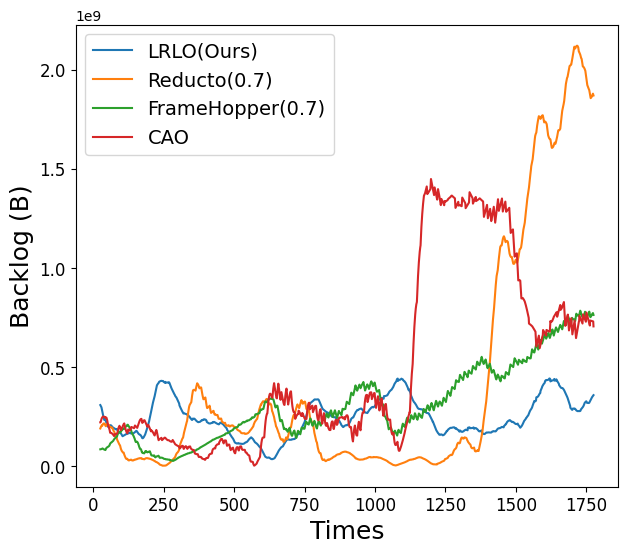

In [193]:
plot_backlog_smoothed(backlog_df_dict, 'JK', 2, scale_factor=0.1, time_limit=1800, window_size=50)

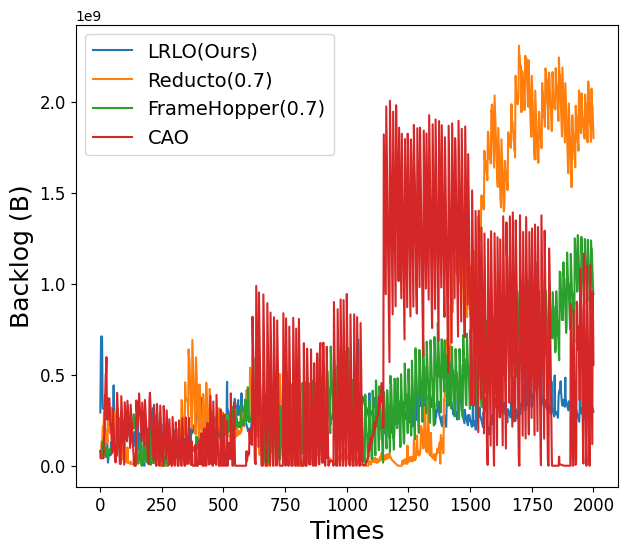

In [194]:
plot_backlog_smoothed(backlog_df_dict, 'JK', 3, scale_factor=0.1, time_limit=2000, window_size=2)